### Imports

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


### Reading Data

In [3]:
# 2. Reading Data from CSV
def read_csv(file_path):
    return pd.read_csv(file_path)
    
# 3. Data Overview and Checks
def dataset_info_statistics(data):
    print("Dataset Information:")
    print(data.info())
    print("\n")
    print("Basic Statistics for Numerical Columns:")
    print(data.describe())
    print("\n")

def check_null(data):
    null_counts = data.isnull().sum()
    print("Null Values in the Dataset:")
    return null_counts

def check_duplicates(data):
    return data.duplicated().any()

# 4. Data Visualization
def plot_graph(data):
    numerical_columns = data.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        plt.figure(figsize=(5, 3))
        sns.distplot(data[column], kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    categorical_columns = data.select_dtypes(include='object').columns

    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(data[column])
        plt.title(f'Countplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
# 5. Feature and Target Separation
def separate_features_target(data, target_column):
    X = data.drop(columns=[target_column], axis=1)
    y = data[target_column]
    
    return X, y

# 6. Train-Test Split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=random_state)
    return X_train, X_test, y_train, y_test

In [4]:
calories = read_csv('calories.csv')
exercise = read_csv('exercise.csv')

In [5]:
data = pd.merge(calories,exercise, on = 'User_ID')

In [6]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
dataset_info_statistics(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


Basic Statistics for Numerical Columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [8]:
check_null(data)

Null Values in the Dataset:


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [9]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

### Analysing Visual Data

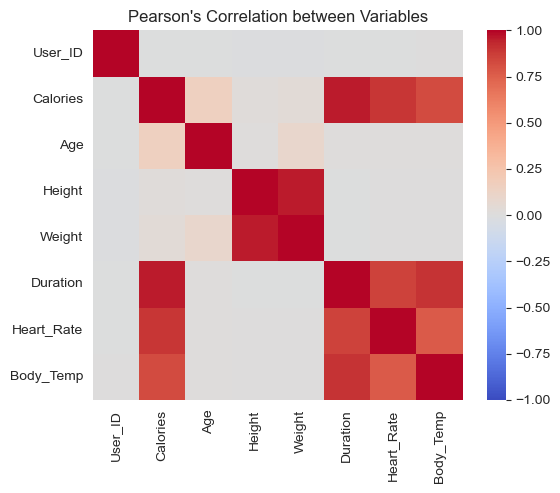

In [10]:
data_temp = data.drop(columns=['Gender'],axis = 1)
correlation_matrix = data_temp.corr(method='pearson')

# Plotting the correlation matrix using Seaborn's heatmap
sns.heatmap(correlation_matrix,vmin = -1.0, vmax = 1.0, cmap='coolwarm', fmt=".25f", square=True)
plt.title("Pearson's Correlation between Variables")
plt.show()

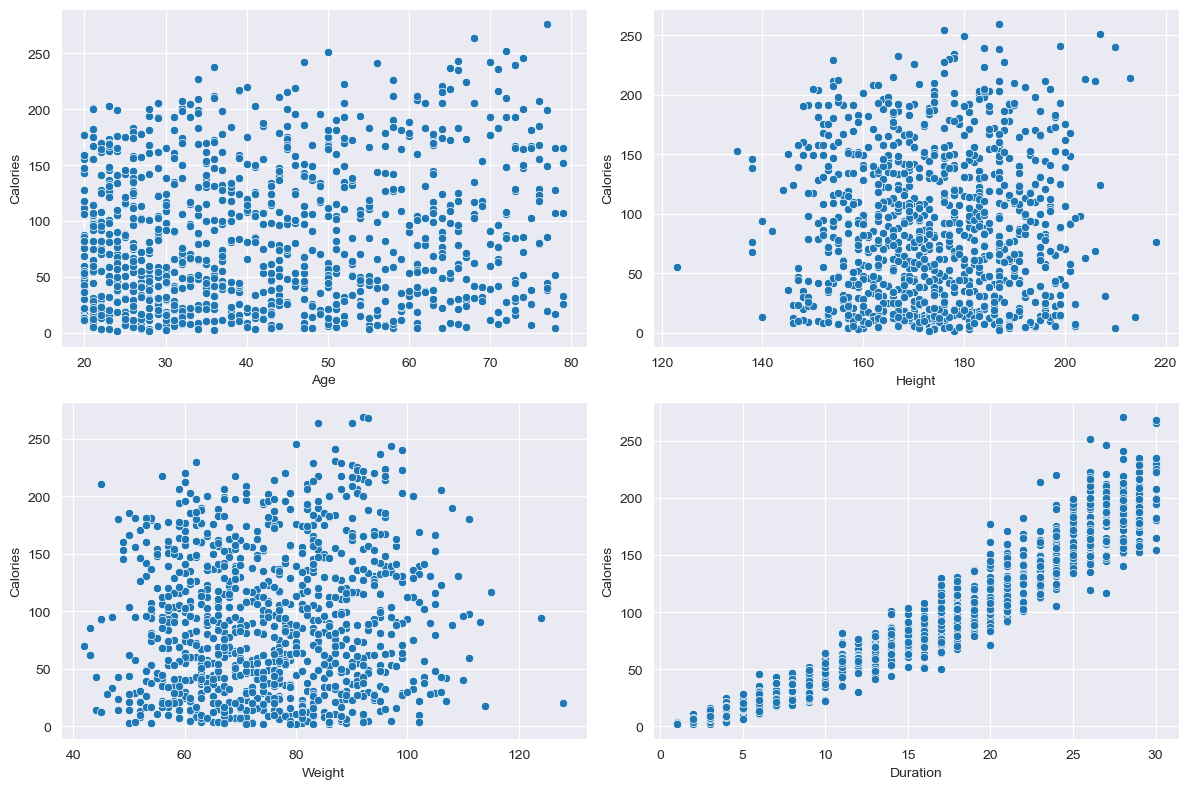

In [11]:
features = ['Age', 'Height', 'Weight', 'Duration']
plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
for i, column in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = data.sample(1000)
    sns.scatterplot(x=x[column],y = x['Calories'])
plt.tight_layout()
plt.show()


In [12]:
X,y = separate_features_target(data,'Calories')

X = X.drop(columns=['User_ID'])

In [13]:
X_train,X_test,y_train,y_test = perform_train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((12000, 7), (3000, 7))

### Column Transformer and Pipeline

In [14]:
# 7. Data Preprocessing and Pipeline Creation
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']),
], remainder='passthrough')

In [15]:

pipeline = Pipeline([("preprocessor", preprocessor), ("model", LinearRegression())])

In [16]:
from sklearn import set_config

In [17]:
set_config(display='diagram')

In [18]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [19]:
# 8. Model Training and Evaluation
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test, y_pred)

0.9672937151257295

In [23]:
from sklearn.model_selection import KFold

In [24]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')

In [27]:
cv_results.mean()

0.9671402283675841

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
mean_absolute_error(y_test, y_pred)

8.441513553849703

In [30]:

# 9. Model Scoring Function
def model_scorer(model_name, model):
    output = []
    output.append(model_name)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(r2_score(y_test, y_pred))
    output.append(mean_absolute_error(y_test, y_pred))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    
    output.append(cv_results.mean())

    return output

In [31]:
# 10. Model Comparison
model_dict = {
    'SVR': SVR(),
    'LR': LinearRegression(),
    'RF': RandomForestRegressor(),
    'XGBR': XGBRegressor()
}

In [32]:
model_output=[]

for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name, model))
    

In [33]:
model_output

[['SVR', 0.992505974855721, 2.363434725371027, 0.991813157386716],
 ['LR', 0.9672937151257295, 8.441513553849703, 0.9671402283675841],
 ['RF', 0.9982825128092974, 1.69025, 0.9979257480282792],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [34]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
    
],remainder='passthrough')

In [35]:
# 11. Model Training with Best Model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [36]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [37]:
# 12. Sample Prediction
sample = pd.DataFrame({
    'Gender': ['male'],
    'Age': [68],
    'Height': [190.0],
    'Weight': [94.0],
    'Duration': [29.0],
    'Heart_Rate': [105.0],
    'Body_Temp': [40.8],
})

print(pipeline.predict(sample))

[231.0721]


## Save the model

In [38]:
import pickle

In [39]:
# 13. Model Saving and Loading
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [40]:

with open('pipeline.pkl', 'rb') as f:
    pipeline_saved = pickle.load(f)

result = pipeline_saved.predict(sample)

print(result)


[231.0721]
